In [35]:
#import os
#os.environ['KMP_DUPLICATE_LIB_OK']='True'

import tensorflow as tf
from tensorflow import keras

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras import backend as K
from tensorflow.keras.utils import get_custom_objects

import numpy as np
import matplotlib.pyplot as plt

def network_model(nr_neurons, nr_layers, choosen_optimizer, choosen_loss, choosen_activation ): 
    #lo costruisco con lo stesso nr di neuroni in ogni layer 
    model = tf.keras.Sequential()
    
    model.add(Dense(nr_neurons, input_shape=(2,),activation=choosen_activation)) #input layer
    
    for i in range(nr_layers): #hidden layers
        model.add(Dense(nr_neurons, activation=choosen_activation))
        
    model.add(Dense(1, activation=choosen_activation)) #output layer
    
    model.compile(optimizer=choosen_optimizer, loss=choosen_loss, metrics=['mse'])
    return model

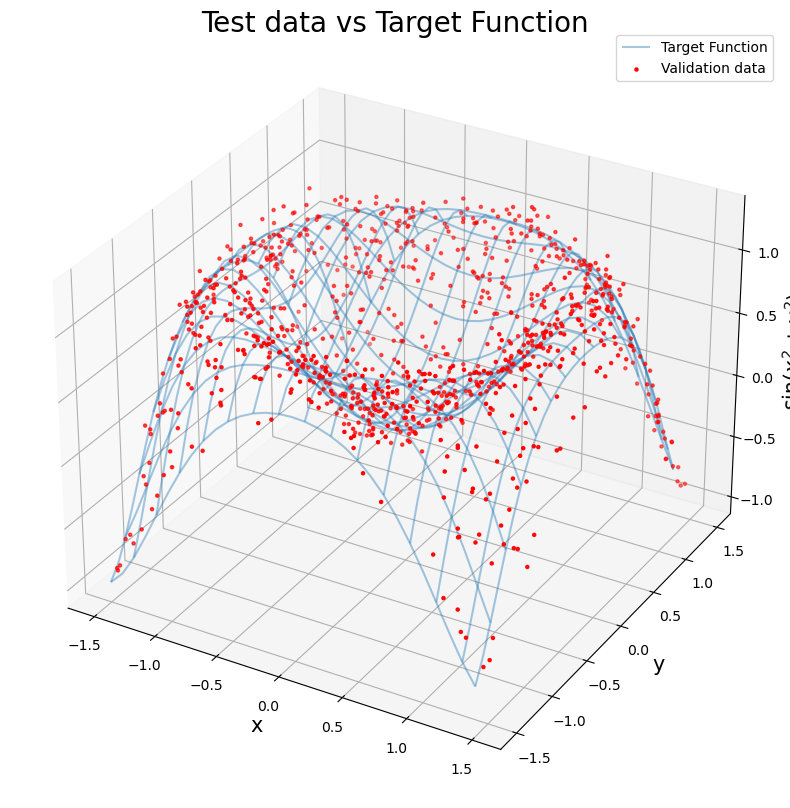

In [90]:
def h(x, y):
    return np.sin(x**2 + y**2)

sigma=0.1 #noise standard deviation

# generate training inputs
np.random.seed(0) #seme generatore di numeri casuali
x_train = np.random.uniform(-3./2, 3./2, 10000)
y_train = np.random.uniform(-3./2, 3./2, 10000)

x_valid = np.random.uniform(-3./2, 3./2, 1000)
y_valid = np.random.uniform(-3./2, 3./2, 1000)
#x_valid.sort() #se sorto non devo plottare
#y_valid.sort()
z_target = h(x_valid, y_valid)

sigma = 0.1
z_train = np.random.normal(h(x_train, y_train), sigma) 
z_valid = np.random.normal(h(x_valid, y_valid), sigma)

from mpl_toolkits.mplot3d import axes3d

fig=plt.figure(figsize=(10,10))
ax = fig.add_subplot(projection='3d')

x_surface = np.arange(-3./2, 3./2, 0.1) #0.05 da cambiare
y_surface = np.arange(-3./2, 3./2, 0.1)
x_grid, y_grid = np.meshgrid(x_surface, y_surface)
ax.plot_wireframe(x_grid, y_grid, h(x_grid, y_grid), rstride =2, cstride=2, label='Target Function', alpha =0.4)


ax.scatter(x_valid, y_valid, z_valid, color='r', label='Validation data', marker='.')
ax.set_xlabel('x', fontsize=15)
ax.set_ylabel('y', fontsize=15)
ax.set_zlabel(r'sin($x^2+y^2$)', fontsize=15)
plt.title ("Test data vs Target Function", fontsize=20, y=1.07)
#ax.view_init(10, 30)
ax.legend()
plt.show()


Model evaluation with test data
Test loss: 0.012940122745931149
Test accuracy: 0.012940122745931149

Model evaluation with exact data
Test loss: 0.0036761672236025333
Test accuracy: 0.0036761672236025333


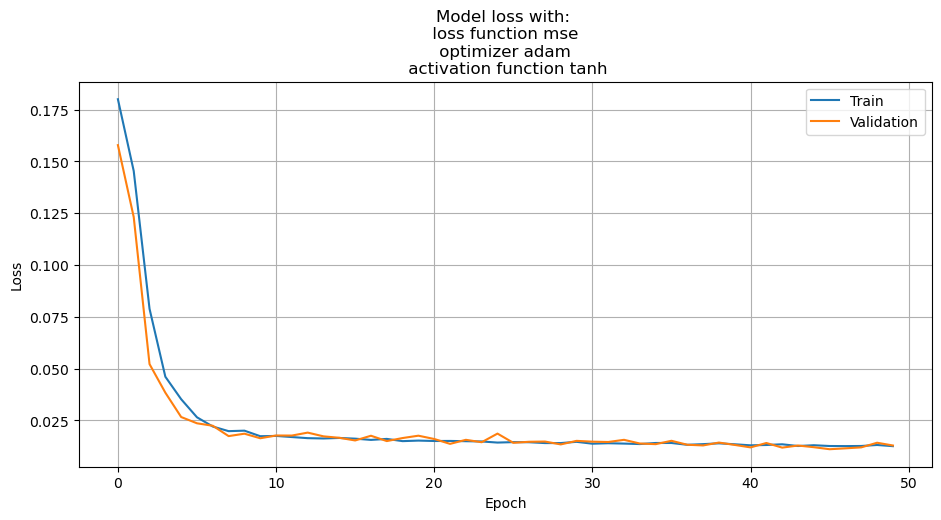

In [91]:
epochs_number = 50
nr_neurons = 20
nr_layers = 5

rows=1
columns=2

model = network_model(nr_neurons, nr_layers, 'adam', 'mse', 'tanh')
#Adam optimization is a stochastic gradient descent method 
#that is based on adaptive estimation of first-order and second-order moments.

merged_train = np.column_stack((x_train, y_train))
merged_valid = np.column_stack((x_valid, y_valid))

history = model.fit(x=merged_train, y=z_train, batch_size=32, epochs=epochs_number, 
                        shuffle=True, validation_data=(merged_valid, z_valid), verbose=0) 

plt.figure(figsize=(11,5))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss with: \n loss function mse \n optimizer adam \n activation function tanh')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.grid(True)
plt.legend(['Train', 'Validation'], loc='best')

# evaluate model sui dati di test
score = model.evaluate(merged_valid, z_valid, batch_size=32, verbose=0)
# print performance
print()
print('Model evaluation with test data')
print('Test loss:', score[0])
print('Test accuracy:', score[1])

# evaluate model with the exact curve quindi su y_target
score = model.evaluate(merged_valid, z_target, batch_size=32, verbose=0)
# print performance
print()
print('Model evaluation with exact data')
print('Test loss:', score[0])
print('Test accuracy:', score[1])

63/63 [==============================] - 0s 1ms/step


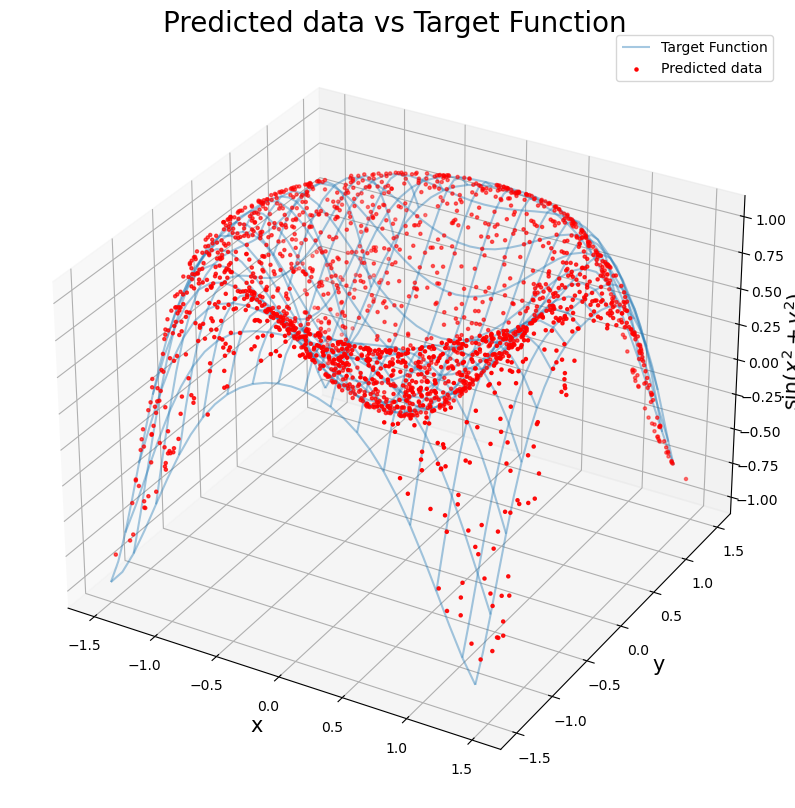

In [92]:
x_predicted = np.random.uniform(-3./2, 3/2, 2000) 
y_predicted = np.random.uniform(-3./2, 3/2, 2000) 
merged_predicted = np.column_stack((x_predicted, y_predicted))
z_predicted = model.predict(merged_predicted)

from mpl_toolkits.mplot3d import axes3d

fig=plt.figure(figsize=(10,10))
ax = fig.add_subplot(projection='3d')

x_surface = np.arange(-3./2, 3./2, 0.1)
y_surface = np.arange(-3./2, 3./2, 0.1)
x_grid, y_grid = np.meshgrid(x_surface, y_surface)
ax.plot_wireframe(x_grid, y_grid, h(x_grid, y_grid), rstride =2, cstride=2, label='Target Function', alpha =0.4)

ax.scatter(x_predicted, y_predicted, z_predicted, color='r', label='Predicted data', marker='.')
ax.set_xlabel('x', fontsize=15)
ax.set_ylabel('y', fontsize=15)
ax.set_zlabel(r'sin($x^2+y^2$)', fontsize=15)
plt.title ("Predicted data vs Target Function", fontsize=20, y=1.07)
#ax.view_init(10, 30)
ax.legend()
plt.show()

Notiamo come per andare ad effettuare un buon fit attraverso il nostro network abbiamo dovuto sostituire lo stochastic gradient descent con l'Adam, uno sgd che e' basato su una stima flessibile dei momenti del primo e del secondo ordine, e come funzione di attivazione siamo passati ad una tangente iperbolica che presente un plateau. \

La parte piu' complicata di questo fit e' stata predire l'andamento sulle quattro code della funzione e, nonostante il grande numero di dati di training, pari a 10000, e i 100 neuroni possiamo osservare come queste vengano si indivudate, ma a malapea popolate. \
Probabilmente, costruendo una rete piu' complessa, con piu strati diverse dimensioni, e ottimizzando parametri e funzioni per la compilazione, si potrebbe riuscire a predire e fittare bene non solo l'andamento nella pancia, ma anche nelle code. \
Complessivamente, pero', ci riteniamo soddisfatti del lavoro svolto soprattutto perche' siamo riusciti a dare una idea dell'andamento della funzione senza utilizzare un network con un numero enorme di parametri che impiegherebbe sensibilmente piu' tempo ad ottimizzarsi.